In [52]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
path='./image/' # path to image files

In [28]:
# list files in the folder
import os
files = os.listdir(path) #'C:/Users/ecoremo/Documents/pygis/raster/image'
for f in sorted(files):
  print(f) # doest not sort naturally

1.tif
10.tif
2.tif
3.tif
4.tif
5.tif
6.tif
7.tif
8.tif
9.tif
sen2a


In [27]:
# read the first band
band = rasterio.open(path+'1.tif')

In [36]:
import re
# natural sorting https://stackoverflow.com/questions/5967500/how-to-correctly-sort-a-string-with-a-number-inside/5967539#5967539

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]
sorted(files, key=natural_keys)


['1.tif',
 '2.tif',
 '3.tif',
 '4.tif',
 '5.tif',
 '6.tif',
 '7.tif',
 '8.tif',
 '9.tif',
 '10.tif',
 'sen2a']

In [37]:
# save a list of bands
# seninel bands = ["B2-Blue","B3-Green", "B4-Red", "B5-Red edge1", "B6-Red edge2", "B7-Red edge3", 
# "B8-NIR","B8A-Red edge4", "B11-SWIR1", "B12-SWIR2"];
bands = sorted(files, key=natural_keys)

'2.tif'

In [41]:
# read blue, green, read and NIR bands
blue =rasterio.open(path+bands[1])
green =rasterio.open(path+bands[2])
red =rasterio.open(path+bands[3])
nir =rasterio.open(path+bands[7])


In [43]:
# check bands
blue.count

1

In [44]:
# number of columns
blue.width

1178

In [45]:
# number of rows
blue.height

1172

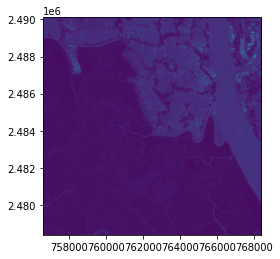

<AxesSubplot:>

In [46]:
# check dimesion
plot.show(blue)

In [48]:
# check data type
blue.dtypes

('float32',)

In [49]:
# check crs
blue.crs

CRS.from_epsg(32645)

In [51]:
# check transform parameters
blue.transform

Affine(10.0, 0.0, 756590.0,
       0.0, -10.0, 2490110.0)

In [56]:
# check matrix array
blue.read(1)

array([[1040., 1072., 1074., ..., 1488., 1332., 1234.],
       [1024., 1040., 1042., ..., 1340., 1410., 1356.],
       [1032., 1038., 1028., ..., 1410., 1400., 1452.],
       ...,
       [ 487.,  435.,  429., ...,  489.,  498.,  455.],
       [ 483.,  458.,  418., ...,  489.,  507.,  421.],
       [ 418.,  429.,  438., ...,  463.,  453.,  441.]], dtype=float32)

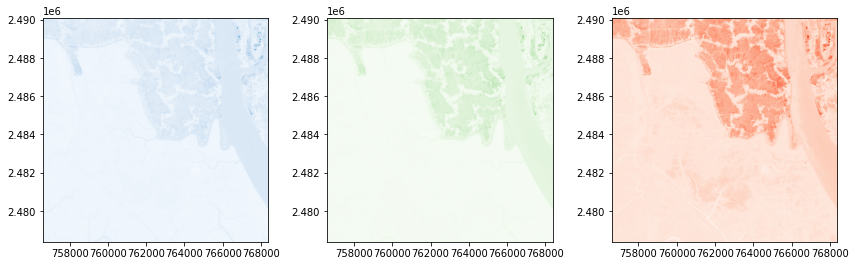

In [54]:
# plot blue, green and red 
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))
plot.show(blue, ax=ax1, cmap="Blues")
plot.show(green, ax=ax2, cmap="Greens")
plot.show(red, ax=ax3, cmap="Reds")
fig.tight_layout()